## Hoverboard Controller

The hoverboard firmware expects a value between -1000 to 1000 to set the speed of a wheel. Values between -49 and 49 are set to 0 in the code.

To test the firmware we run the code in test-firmware.py on the robot and pipe the output to the a file. A sample file is provided in test-firmware.log. No ground forces were applied when running the test.

We analyze the log file

In [1]:
import numpy as np
data = np.loadtxt("test-firmware.log")
columns = ['set_speed_r', 'set_speed_l', 'battery', 'current_r', 'current_l', 'speed_r', 'speed_l']
colmap = dict(zip(columns, range(len(columns))))

In [2]:
def get_stats(data, feedback):
    side = 'r'
    set_speeds = np.unique(data[:, colmap["set_speed_%s" % side]])
    for set_speed in set_speeds:
        s_max = data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]].max()
        s_min = data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]].min()
        s_av = np.average(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_med = np.median(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_std = np.std(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_values = np.unique(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        s_spread = len(s_values)
        print("set_speed_%s:%s min:%.2f max:%.2f average:%.2f median:%.2f deviation:%.2f" % (side, int(set_speed), s_min, s_max, s_av, s_med, s_std))

In [3]:
feedback = "speed_r"
get_stats(data, feedback)

set_speed_r:0 min:-0.00 max:-0.00 average:0.00 median:0.00 deviation:0.00
set_speed_r:100 min:13.26 max:16.61 average:14.69 median:14.68 deviation:0.68
set_speed_r:200 min:33.83 max:41.34 average:37.08 median:36.95 deviation:1.53
set_speed_r:300 min:54.05 max:65.31 average:59.35 median:59.26 deviation:2.35
set_speed_r:400 min:74.07 max:89.89 average:81.60 median:81.22 deviation:3.06
set_speed_r:500 min:94.12 max:113.48 average:102.87 median:102.56 deviation:3.90
set_speed_r:600 min:113.48 max:135.59 average:124.00 median:123.08 deviation:4.64
set_speed_r:700 min:131.15 max:158.42 average:144.68 median:144.14 deviation:5.29
set_speed_r:800 min:150.94 max:181.82 average:164.73 median:164.95 deviation:6.00
set_speed_r:900 min:168.42 max:202.53 average:184.78 median:183.91 deviation:6.88
set_speed_r:1000 min:186.05 max:222.22 average:204.22 median:205.13 deviation:7.43


In [4]:
feedback = "speed_l"
get_stats(data, feedback)

set_speed_r:0 min:0.00 max:0.00 average:0.00 median:0.00 deviation:0.00
set_speed_r:100 min:17.64 max:24.43 average:20.67 median:20.43 deviation:1.30
set_speed_r:200 min:43.13 max:59.04 average:50.29 median:50.31 deviation:3.09
set_speed_r:300 min:68.67 max:93.57 average:79.73 median:80.00 deviation:5.07
set_speed_r:400 min:94.12 max:125.98 average:108.71 median:108.84 deviation:6.87
set_speed_r:500 min:119.40 max:158.42 average:137.30 median:137.93 deviation:8.40
set_speed_r:600 min:145.45 max:190.48 average:164.04 median:164.95 deviation:9.61
set_speed_r:700 min:168.42 max:222.22 average:193.25 median:192.77 deviation:10.98
set_speed_r:800 min:192.77 max:253.97 average:218.30 median:219.18 deviation:12.95
set_speed_r:900 min:216.22 max:280.70 average:243.42 median:242.42 deviation:14.18
set_speed_r:1000 min:235.29 max:313.73 average:268.08 median:266.67 deviation:15.65


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [6]:
def draw_feedback(data, max_speed, feedback1, feedback2):
    i = 0
    set_speeds = np.unique(data[:, colmap["set_speed_r"]])
    fig, axs = plt.subplots(len(set_speeds), 2,figsize=(15,10))
    for set_speed in set_speeds:
        for k in range(2):
            if k:
                feedback = feedback2
            else:
                feedback = feedback1
            y = data[data[:, colmap["set_speed_r"]] == set_speed][:, colmap[feedback]]
            x = range(len(y))
            axs[i, k].set_ylim([0, max_speed])
            axs[i, k].plot(x,y)
        i += 1

In [7]:
def get_speed(data, feedback):
    side = 'r'
    set_speeds = np.unique(data[:, colmap["set_speed_%s" % side]])
    speed = []
    for set_speed in set_speeds:
        s_med = np.median(data[data[:, colmap["set_speed_%s" % side]] == set_speed][:, colmap[feedback]])
        speed.append(s_med)
    return set_speeds, speed

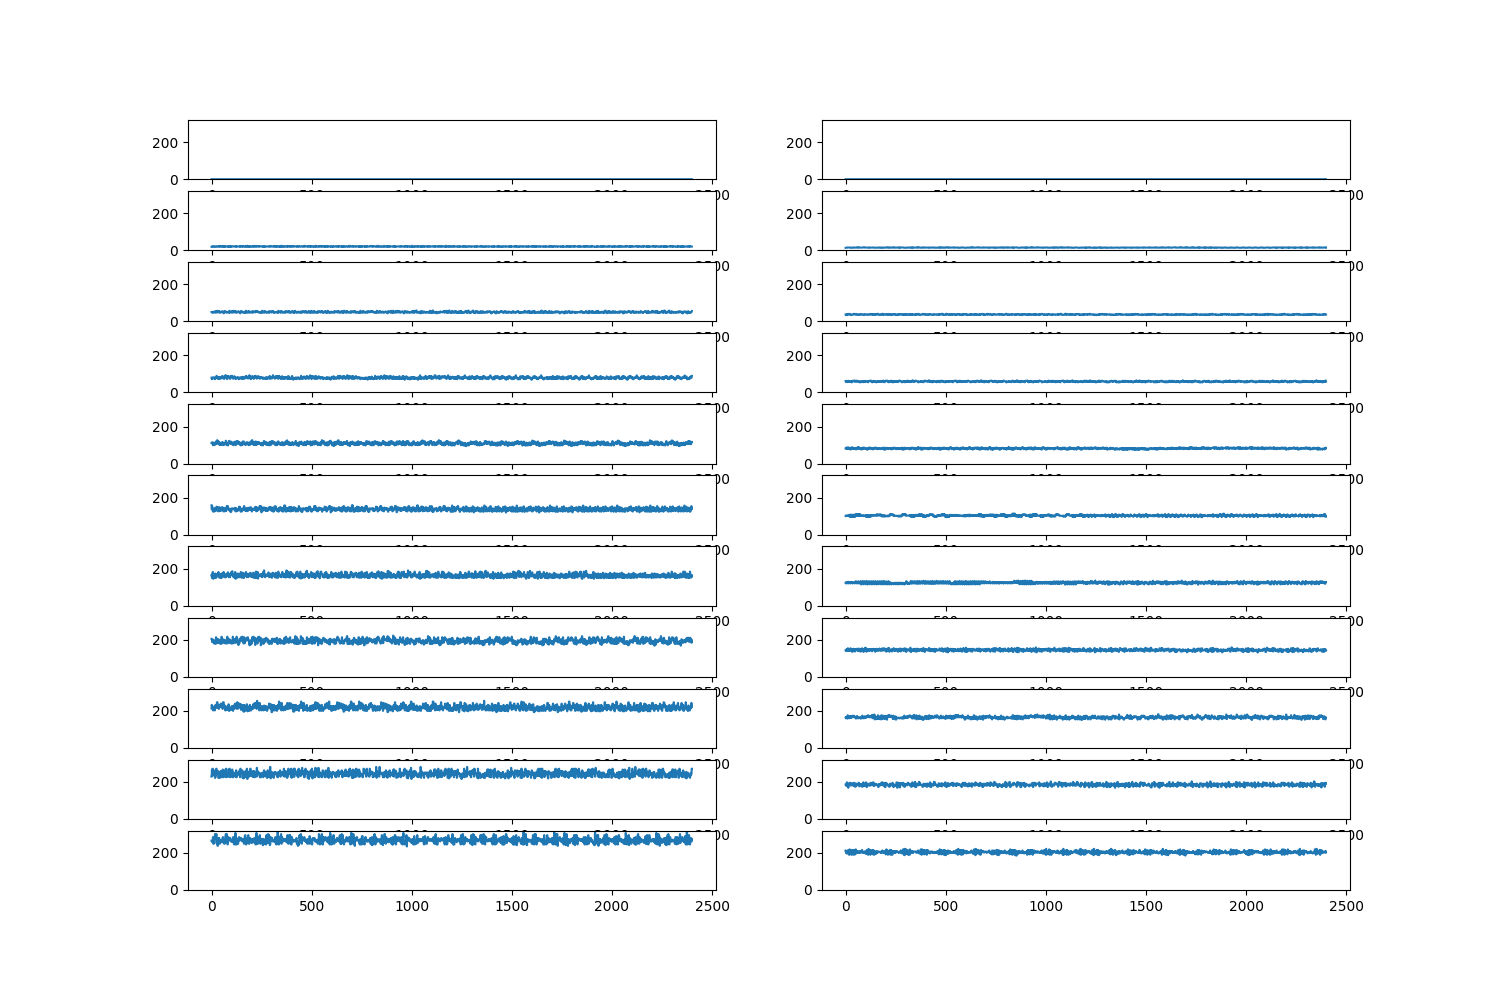

In [8]:
draw_feedback(data, 320, "speed_l", "speed_r")

In [9]:
X, YR = get_speed(data, "speed_r")
X, YL = get_speed(data, "speed_l")

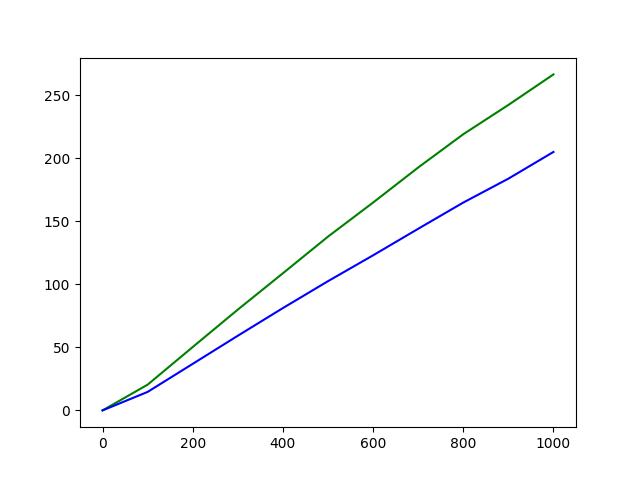

In [10]:
fig, ax = plt.subplots()
ax.plot(X,YL, 'g')
ax.plot(X,YR, 'b')

In [11]:
factor_r = (YR[4] - YR[2])/(X[4] - X[2])
factor_l = (YL[4] - YL[2])/(X[4] - X[2])
print("%.2f %.2f" % (factor_l, factor_r))

0.29 0.22


### Observations
There are differences between the wheel. The speed set differs from the speed measured

The variation of feedback is also quite signigicant, in particular at a speed setting of 100. Since we want to move the robot at low speed we need to have a closer look.
For that we run test-firmware.py again but we modify the code to cover a range from 50 to 160 with a step size of 10

A sample log is in test-firmware-slow.log. No ground forces were applied when runnung the test.

In [12]:
data = np.loadtxt("test-firmware-slow.log")
columns = ['set_speed_r', 'set_speed_l', 'battery', 'current_r', 'current_l', 'speed_r', 'speed_l']
colmap = dict(zip(columns, range(len(columns))))

In [13]:
feedback = "speed_r"
get_stats(data, feedback)

set_speed_r:50 min:1.97 max:4.07 average:3.14 median:3.15 deviation:0.48
set_speed_r:60 min:4.45 max:6.61 average:5.51 median:5.47 deviation:0.47
set_speed_r:70 min:6.83 max:9.17 average:7.86 median:7.82 deviation:0.49
set_speed_r:80 min:9.02 max:11.64 average:10.15 median:10.11 deviation:0.54
set_speed_r:90 min:11.16 max:14.12 average:12.41 median:12.38 deviation:0.60
set_speed_r:100 min:13.27 max:16.49 average:14.63 median:14.65 deviation:0.67
set_speed_r:110 min:15.36 max:18.93 average:16.90 median:16.91 deviation:0.76
set_speed_r:120 min:17.45 max:21.42 average:19.12 median:19.12 deviation:0.81
set_speed_r:130 min:19.54 max:23.88 average:21.36 median:21.33 deviation:0.90
set_speed_r:140 min:21.65 max:26.32 average:23.71 median:23.60 deviation:0.97
set_speed_r:150 min:23.56 max:28.73 average:25.84 median:25.76 deviation:1.05


In [14]:
feedback = "speed_l"
get_stats(data, feedback)

set_speed_r:50 min:4.15 max:6.65 average:5.31 median:5.33 deviation:0.53
set_speed_r:60 min:7.10 max:10.04 average:8.46 median:8.37 deviation:0.64
set_speed_r:70 min:9.81 max:13.47 average:11.58 median:11.46 deviation:0.79
set_speed_r:80 min:12.48 max:17.11 average:14.58 median:14.41 deviation:0.94
set_speed_r:90 min:15.09 max:20.67 average:17.61 median:17.43 deviation:1.14
set_speed_r:100 min:17.64 max:24.21 average:20.57 median:20.36 deviation:1.32
set_speed_r:110 min:20.23 max:27.73 average:23.52 median:23.32 deviation:1.49
set_speed_r:120 min:22.79 max:31.19 average:26.40 median:26.21 deviation:1.63
set_speed_r:130 min:25.32 max:34.63 average:29.46 median:29.30 deviation:1.86
set_speed_r:140 min:27.87 max:38.10 average:32.37 median:32.19 deviation:2.02
set_speed_r:150 min:30.36 max:41.56 average:35.35 median:35.16 deviation:2.26


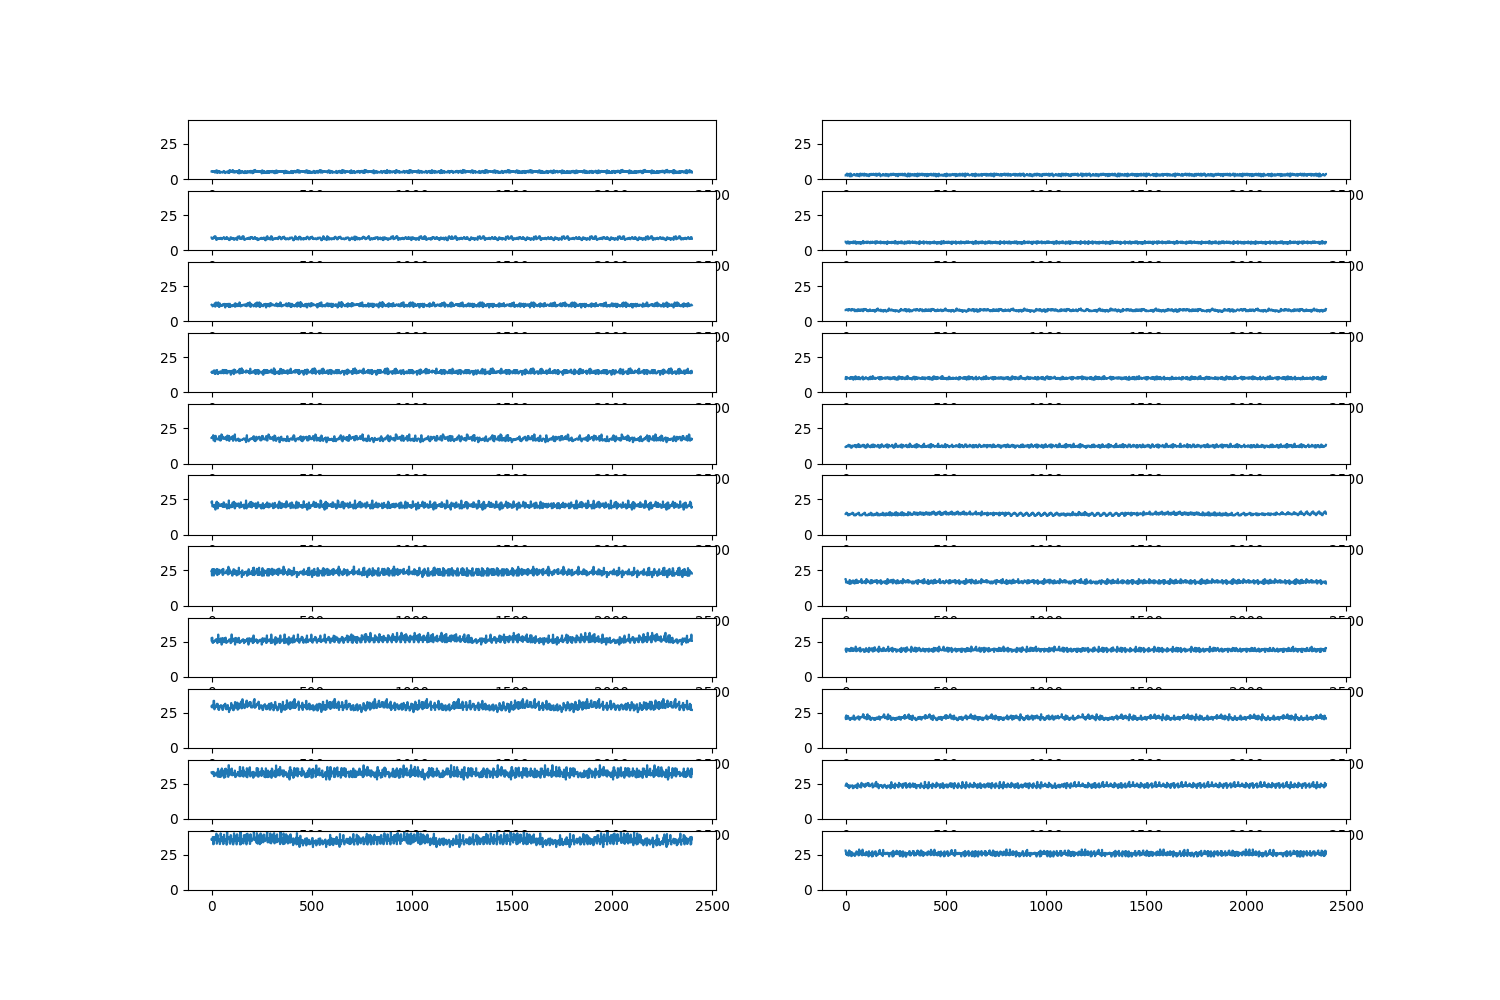

In [15]:
draw_feedback(data, 42, "speed_l", "speed_r")

In [16]:
X, YR = get_speed(data, "speed_r")
X, YL = get_speed(data, "speed_l")

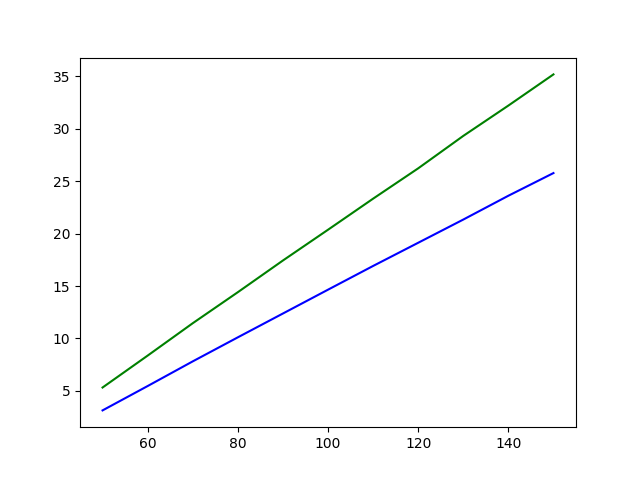

In [17]:
fig, ax = plt.subplots()
ax.plot(X,YL, 'g')
ax.plot(X,YR, 'b')

In [18]:
factor_r = (YR[4] - YR[2])/(X[4] - X[2])
factor_l = (YL[4] - YL[2])/(X[4] - X[2])
print("%.2f %.2f" % (factor_l, factor_r))

0.30 0.23


### Calibration
As we can see the two motors react different to the same input values, we have to calibrate the robot on a per motor basis

### Firmware code

UART communication with the proxy is handled in commsSteering.c The speed for each wheel is stored in the global variables defied in main.c

    int32_t leftSpeed = 0;                                                                          // left speed setpoint (-1000,+1000)
    int32_t rightSpeed = 0;                                                                         // right speed setpoint (-1000,+1000)

These values are clamped as follows

    pwmSlave  =  leftSpeed < 50 &&  leftSpeed > -50 ? 0 : CLAMP( leftSpeed, -1000, 1000) * SPEED_COEFFICIENT;
    pwmMaster = rightSpeed < 50 && rightSpeed > -50 ? 0 : CLAMP(rightSpeed, -1000, 1000) * SPEED_COEFFICIENT;
    
where SPEED_COEFFICIENT is set to -1 in config.h

The values reported back to the proxy are:

    float realSpeed = 0.0;
    
and calculated as 

          // Increments with 62.5us
          if(loopCounter < 16000 && inc == 0) // Number of loops with no increment gives time
          {
                  loopCounter++;
          }
          else
          {
                  if (inc != last_inc)
                  {
                          last_inc = inc;
                          // Wait for direction to be determined in next loop
                  }
                  else
                  {
                          // Set and calculate velocity
                          realSpeed = (float)inc * 16000.0 / (float)loopCounter; // Ticks per Second
                          loopCounter = 0;
                  }
          }
      
in bldc.c
    
comment in it.c: 

      -> pwm of timer0 running with 16kHz -> interrupt every 31,25us

### real Speed

What we are measuring is the time between hall position changes and there are 6 hall positions in a full rotation.


In [19]:
1 / 16000.0

6.25e-05

### BLDC calculations
BLDC calculations are done in bldc.c

The functions are as flollows:

    //----------------------------------------------------------------------------
    // Block PWM calculation based on position
    //----------------------------------------------------------------------------
    void blockPWM(int pwm, int pwmPos, int *y, int *b, int *g)

    //----------------------------------------------------------------------------
    // Set motor enable
    //----------------------------------------------------------------------------
    void SetEnable(FlagStatus setEnable)

    //----------------------------------------------------------------------------
    // Set pwm -1000 to 1000
    //----------------------------------------------------------------------------
    void SetPWM(int16_t setPwm)

    //----------------------------------------------------------------------------
    // Calculation-Routine for BLDC => calculates with 16kHz
    //----------------------------------------------------------------------------
    void CalculateBLDC(void)

using the following commutation table:

    //----------------------------------------------------------------------------
    // Commutation table
    //----------------------------------------------------------------------------
    const uint8_t hall_to_pos[8] =
    {
            // annotation: for example SA=0 means hall sensor pulls SA down to Ground
      0, // hall position [-] - No function (access from 1-6)
      3, // hall position [1] (SA=1, SB=0, SC=0) -> PWM-position 3
      5, // hall position [2] (SA=0, SB=1, SC=0) -> PWM-position 5
      4, // hall position [3] (SA=1, SB=1, SC=0) -> PWM-position 4
      1, // hall position [4] (SA=0, SB=0, SC=1) -> PWM-position 1
      2, // hall position [5] (SA=1, SB=0, SC=1) -> PWM-position 2
      6, // hall position [6] (SA=0, SB=1, SC=1) -> PWM-position 6
      0, // hall position [-] - No function (access from 1-6)
    };